# Import Libraries

In [19]:
from Bio.SeqIO import PirIO
import Bio.SeqIO as SeqIO
import h5py
from time import time
import numpy as np
import sys
import pandas as pd
import matplotlib.pyplot as plt


from matplotlib.ticker import NullFormatter
from sklearn.manifold import TSNE
import umap
import seaborn as snsfrom openTSNE import TSNE as OpenTSNE

# Load-in the data

**Important:** Set $i$ to the number of points you want to read

In [2]:
if __name__ == "__main__":
    h5py_file = 'data/ec_vs_NOec_pide100_c50.h5'
    fasta_path = 'data/nonRed_dataset/ec_vs_NOec_pide20_c50_train.fasta'
    anno = 'data/annotations/merged_anno.txt'

    print(h5py_file)
    proteins = []
    print('LOAD - This may take a while, if you run this the first time!')
    # https://stackoverflow.com/questions/20928136/input-and-output-numpy-arrays-to-h5py
    count = 0

    # First I want to see the splitt only in the 6 main-classes, befor we do something fancy here.
    def reduceAnno(anno: str):
        i = int(anno[0])
        return i

    
    # 2D array 
    arr = np.zeros((7,100))
    
    
    identifiers = []
    embeding = []
    color = []
    with open(anno) as fp:
        with h5py.File(h5py_file, 'r') as h5:
            i = 0
            for line in fp:
                input = line.strip().split('\t')
                if input[0] in h5:
                    identifiers.append(input[0])
                    # print(h5[input[0]])
                    embeding.append(h5[input[0]][:])
                    color.append(reduceAnno(input[1]))
                    
                    # concert to string for 'split'-method later 
                    # schould probably be moved to the reduceAnno function
                    a = str(input[1])
                    EC1 = int(a[0])-1
                    if a.split('.')[1].split('.')[0] == '-':
                        EC2 = 0
                    else:
                        EC2 = int(a.split('.')[1].split('.')[0])
                    arr[EC1,EC2] += 1
                    
                    
                    i += 1
                
                if i == 10000:
                    break
                    
                else:
                    pass
                    # print(input[0], 'NOT FOUND')

                sys.stdout.write('\r' + str(i))

data/ec_vs_NOec_pide100_c50.h5
LOAD - This may take a while, if you run this the first time!
9999

# Statistics

## Class and Subclass Distribution

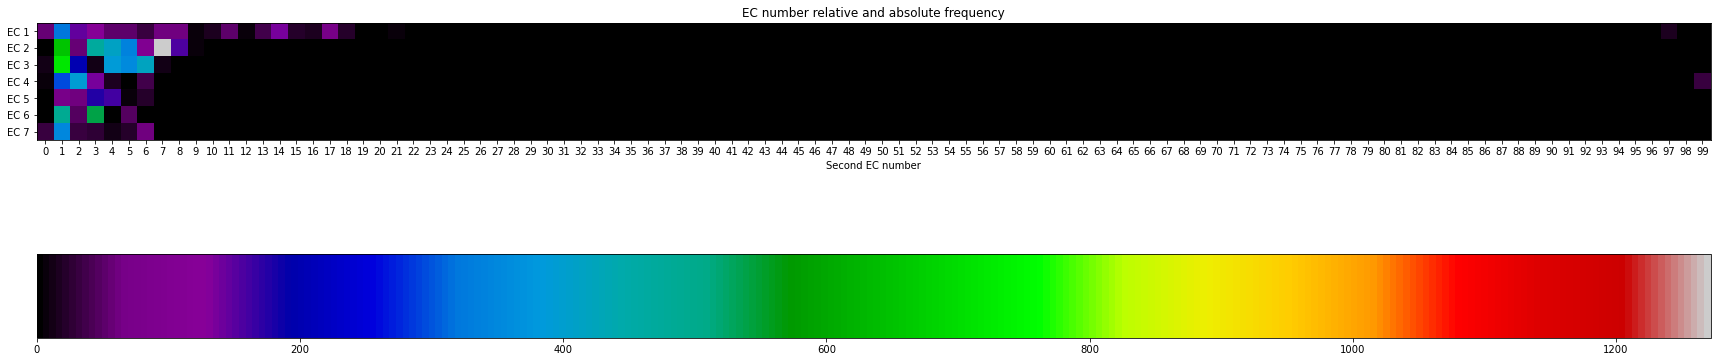

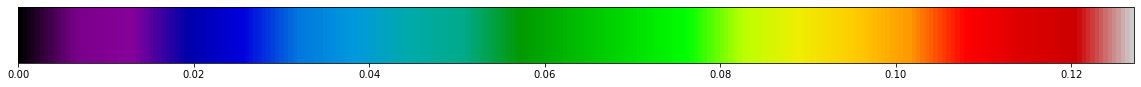

In [9]:
fig= plt.figure(figsize=(30,14))


labelsy = ['EC 1', 'EC 2', 'EC 3', 'EC 4', 'EC 5', 'EC 6', 'EC 7' ]



plt.imshow(arr, cmap='nipy_spectral', interpolation='nearest')
ax = plt.gca()

ax.set_xlabel('Second EC number')
ax.set_title('EC number relative and absolute frequency')
ax.set_yticks([0,1,2,3,4,5,6])
ax.set_xticks(np.linspace(0, 99, num=100))
ax.set_yticklabels(labelsy)
plt.colorbar(orientation="horizontal")

plt.show()

fig= plt.figure(figsize=(20,14))

plt.imshow(arr/np.sum(arr), cmap='nipy_spectral', interpolation='nearest')
plt.gca().set_visible(False)
plt.colorbar(orientation="horizontal")

plt.show()

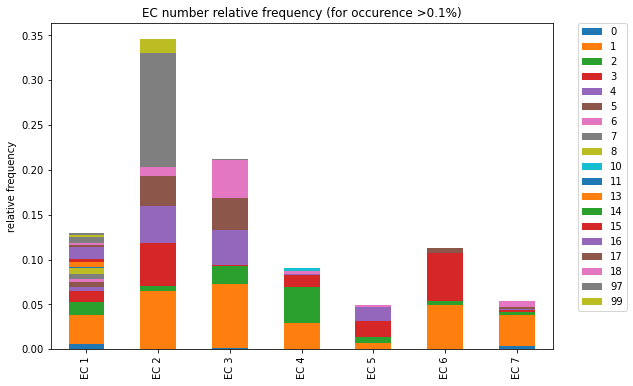

In [10]:
thresh = 0.001
arr1 = arr/np.sum(arr)
arr1 = (arr1 > thresh) * arr1

pd.DataFrame(arr1).plot(kind='bar',stacked=True,figsize=(9, 6),label=np.unique(np.argwhere(arr1 > 0.00)[:,1]))
plt.legend(np.unique(np.argwhere(arr1 > 0.00)[:,1]),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax = plt.gca()

ax.set_ylabel('relative frequency')
ax.set_title('EC number relative frequency (for occurence >' + str(thresh*100) +'%)')
ax.set_xticklabels(labelsy)
plt.show()

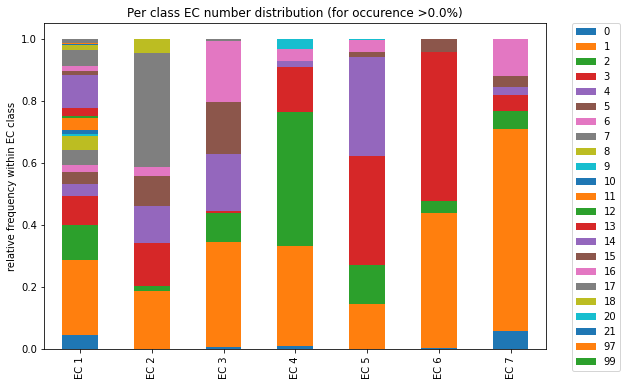

In [11]:
thresh = 0.0
arr2 = (arr > thresh) * arr

for i in range(0,7):
    arr2[i] = arr2[i]/np.sum(arr2[i])


pd.DataFrame(arr2).plot(kind='bar',stacked=True,figsize=(9, 6),label=np.unique(np.argwhere(arr2 > 0.00)[:,1]))
plt.legend(np.unique(np.argwhere(arr2 > 0.00)[:,1]),bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax = plt.gca()

ax.set_ylabel('relative frequency within EC class')
ax.set_title('Per class EC number distribution (for occurence >' + str(thresh*100) +'%)')
ax.set_xticklabels(labelsy)
plt.show()

# Low-dimensional Embeddings

## t-sne

In [16]:
perplexity = 30
n_iter = 250

Start transform
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.177s...
[t-SNE] Computed neighbors for 10000 samples in 193.855s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.299852
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.030945
[t-SNE] KL divergence after 251 iterations: 17976931348623157

/Users/jlrestrepol/miniconda2/envs/ProtPred/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


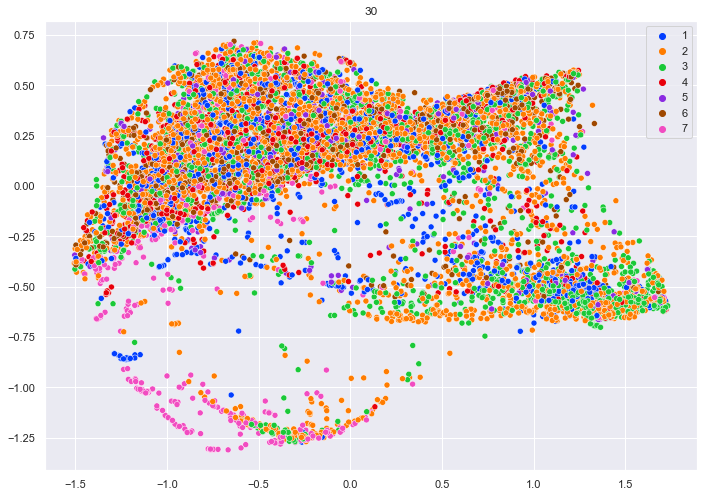

In [18]:
tsne = OpenTSNE(n_jobs=12, n_components=2, perplexity=perplexity, n_iter=n_iter, verbose=1, random_state=24112020)

sns.set(rc={'figure.figsize': (11.7, 8.27)})
palette = sns.color_palette("bright", len(np.unique(np.array(color))))
print('Start transform')
t0 = time()
Y = tsne.fit_transform(np.asarray(embeding))
t1 = time()
print("%s: %.2g sec" % ('TSNE', t1 - t0))
sns.scatterplot(Y[:, 0], Y[:, 1], hue=color, legend='full', palette=palette)
plt.title(str(perplexity))
plt.show()

## UMAP

In [34]:
reducer = umap.UMAP(random_state=42, n_neighbors=30)

In [35]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})
palette = sns.color_palette("bright", len(np.unique(np.array(color))))
print('Start transform')
t0 = time()
embedding = reducer.fit_transform(np.stack(embeding))
t1 = time()
print("%s: %.2g sec" % ('UMAP', t1 - t0))

Start transform
UMAP: 38 sec


/Users/jlrestrepol/miniconda2/envs/ProtPred/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


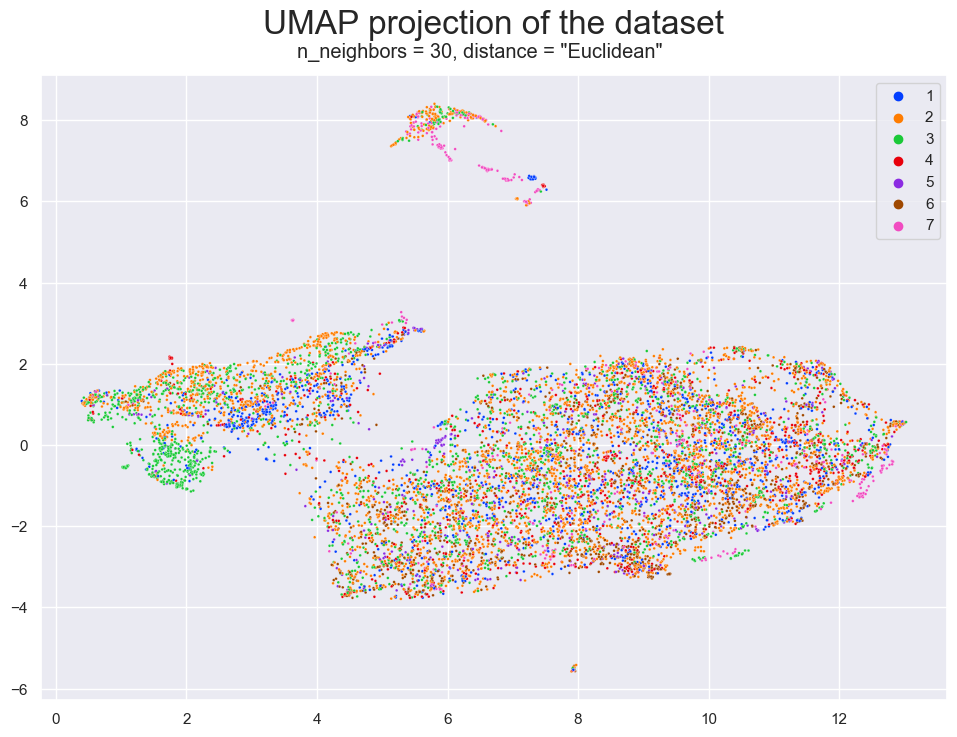

In [41]:
plt.figure(dpi = 100)
sns.scatterplot(embedding[:, 0], embedding[:, 1], hue=color, legend='full', s=4, palette=palette)
plt.title('UMAP projection of the dataset', pad=30, fontsize = 24)
plt.suptitle('n_neighbors = 30, distance = "Euclidean"', y = 0.92)
plt.show()